In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# dataset indonesia (jakarta)
case = pd.read_csv('data/new/case_maret_july.csv')
mobility = pd.read_csv('data/new/mobility_maret_july.csv')
weather = pd.read_csv('data/new/weather_maret_july.csv')
case.set_index('date', inplace=True)
#weather.set_index('date', inplace=True)
mobility.set_index('date', inplace=True)

In [3]:
new_weather = weather.interpolate(method='spline', order=2)
new_weather.head()

new_weather.set_index('date', inplace=True)

In [4]:
# Differencing order = 1
mobility_diff = mobility.diff(periods=1)
mobility_diff = mobility_diff.iloc[1:]

case_diff = case.diff(periods=1)
case_diff = case_diff.iloc[1:]

new_weather = new_weather.iloc[1:]
mobility_diff.head()

,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,
2020-03-19,-6.0,-9.0,-5.0,-6.0,-2.0,1.0
2020-03-20,-2.0,1.0,1.0,-4.0,-2.0,3.0
2020-03-21,-5.0,6.0,-6.0,2.0,13.0,-4.0
2020-03-22,-14.0,-17.0,-21.0,-9.0,-2.0,3.0
2020-03-23,9.0,3.0,16.0,-4.0,-22.0,4.0


In [5]:
data = pd.concat([case_diff, new_weather, mobility_diff], axis=1)
data.head()

,case,rh,avt,mxt,mnt,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,,,,,,
2020-03-19,12.0,83.0,28.1,31.4,25.800000,-6.0,-9.0,-5.0,-6.0,-2.0,1.0
2020-03-20,-36.0,82.0,27.4,31.2,25.200000,-2.0,1.0,1.0,-4.0,-2.0,3.0
2020-03-21,30.0,81.0,28.1,32.4,26.521978,-5.0,6.0,-6.0,2.0,13.0,-4.0
2020-03-22,-8.0,84.0,27.2,31.2,25.000000,-14.0,-17.0,-21.0,-9.0,-2.0,3.0
2020-03-23,15.0,81.0,28.2,31.8,25.000000,9.0,3.0,16.0,-4.0,-22.0,4.0


In [6]:
data.shape

(422, 11)

In [7]:
train = data[:412]
test = data[412:]

In [8]:
X = train[['rh', 'avt', 'mxt', 'mnt', 'retail_recreation', 'grocery_pahrmacy', 'parks', 'transit_station', 'workplace', 'residential']]
y = train['case']

In [9]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [10]:
case_true = test['case']
del test['case']

In [11]:
case_predict = regr.predict(test)

print(case_predict)

[ -9.80926476  32.63717572  11.77967701 -43.01539498   6.53302297
  26.67700083 -18.31218072  22.41622033 117.81437061 -74.44103752]


In [12]:
list_hasil = case_predict.tolist()
list_eval = case_true.tolist()

In [13]:
rmse = mean_squared_error(list_eval, list_hasil, squared=False)
rmse

191.6046825722526

In [14]:
mse = mean_squared_error(list_eval, list_hasil)
mse

36712.35438361368

In [15]:
mae = mean_absolute_error(list_eval, list_hasil)
mae

140.70965397556643

<AxesSubplot:>

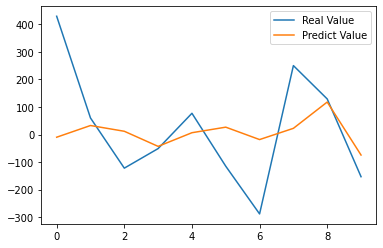

In [16]:
compare = pd.DataFrame(list(zip(list_eval, list_hasil)), columns =['Real Value', 'Predict Value'])
compare.plot()